## Load data

In [1]:
import numpy as np
import _pickle as pkl
import torch
import torch.nn as nn
from torchvision import transforms
%matplotlib inline 
import matplotlib.pyplot as plt
import os, sys, time
sys.path.append('../..')
from utils import set_seed_torch, rgb2gray
set_seed_torch(3)
from argparse import Namespace
import json
from utils import load_models, load_vh_models, frame_stack

In [2]:
class ObjectView(object):
    def __init__(self, d): self.__dict__ = d
        
args = ObjectView({'res': 64,
 'dataset_path': '/home/olimoyo/visual-haptic-dynamics/experiments/data/datasets/{}'
                   .format("visual_haptic_2D_len16_osc_withGT_8C12919B740845539C0E75B5CBAF7965.pkl"),
 'models_dir': '/home/olimoyo/visual-haptic-dynamics/saved_models/{}'
                   .format("vaughan/osc"),
 'device': 'cuda:0',
 'n_examples': 5,
 'n_pred': 8,
})

def load_models_dir(models_dir):
    """Load hyperparameters from trained model."""
    dict_of_models = {}
    for filedir in os.listdir(models_dir):
        fullpath = os.path.join(models_dir, filedir)
        if os.path.isdir(fullpath):
            with open(os.path.join(fullpath, 'hyperparameters.txt'), 'r') as fp:
                dict_of_models[fullpath] = Namespace(**json.load(fp))
    return dict_of_models

In [3]:
with open(args.dataset_path, 'rb') as f:
    raw_data = pkl.load(f)

data = {}
data['img_rgb'] = torch.from_numpy(raw_data["img"].transpose(0, 1, 4, 2, 3)).int().to(device=args.device)
data['img_gray'] = torch.from_numpy(rgb2gray(raw_data["img"]).transpose(0, 1, 4, 2, 3)).float().to(device=args.device)
data['haptic'] = torch.from_numpy(raw_data['ft']).float().to(device=args.device) / 100.0
data['arm'] = torch.from_numpy(raw_data['arm']).float().to(device=args.device)

actions = torch.from_numpy(raw_data["action"]).to(device=args.device).float()

## Visualize

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/winitdef_lm_ul_osc_vha_r1.00_kl0.50_lr3e4
MSE of predictions:  [54.92663  48.291813 32.277954 40.78303  22.397007 32.7913   55.4969
 62.12059 ]


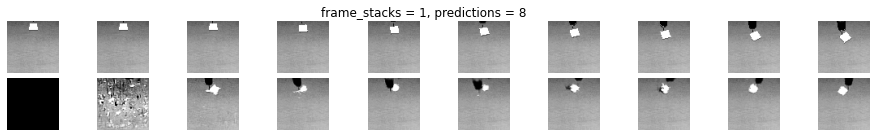

MSE of predictions:  [57.32523  60.425533 53.45022  47.650433 35.566986 52.523594 67.88988
 81.325745]


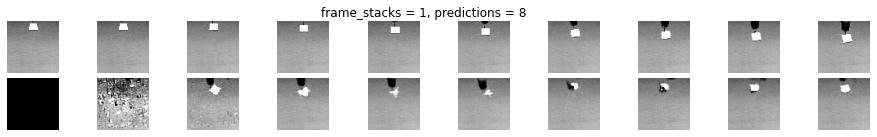

MSE of predictions:  [47.598522 36.739758 47.08684  31.401533 23.5672   32.40275  36.192596
 35.197098]


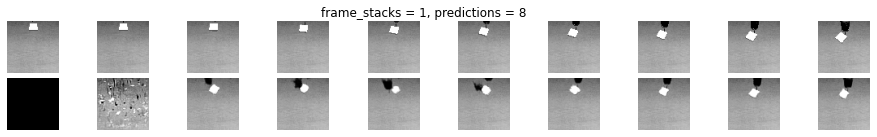

MSE of predictions:  [78.78145  35.104675 22.208397 18.166294 21.707983 19.774323 25.580067
 41.558285]


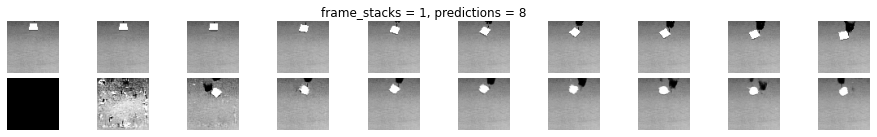

MSE of predictions:  [82.25789  49.701504 21.830753 26.341288 40.66055  47.0012   55.208168
 67.34593 ]


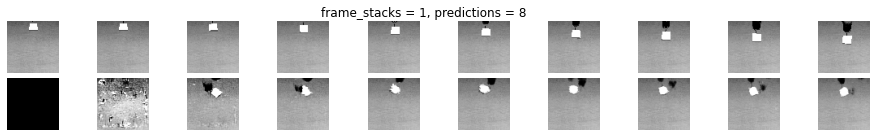

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/lm_ul_osc_v_r1.00_kl0.50_lr3e4
MSE of predictions:  [ 2.40028   8.211495  7.368353 10.673962 13.337513 19.01256  23.870356
 30.817152]


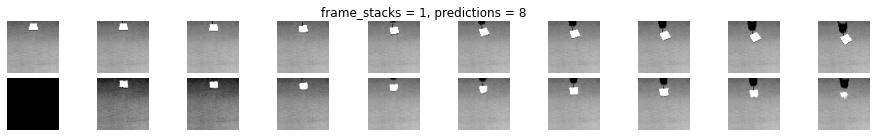

MSE of predictions:  [ 3.1200604  5.0564065  7.088797   8.91239   16.628574  22.590906
 26.983835  40.233337 ]


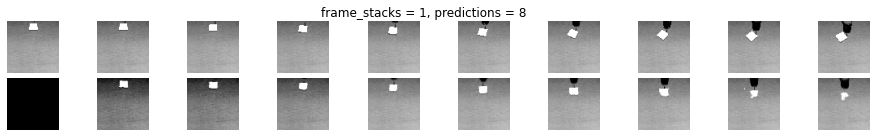

MSE of predictions:  [ 4.6192718  5.71899   10.261468  16.837406  23.743082  33.688866
 40.68339   59.85135  ]


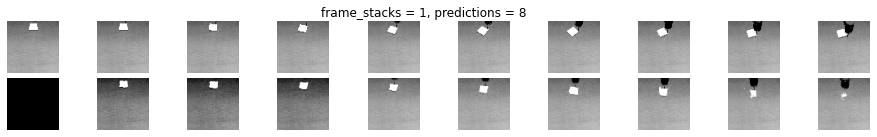

MSE of predictions:  [ 2.3376737  7.640866  10.258023  10.544959  12.473406  14.776219
 11.730248  13.675789 ]


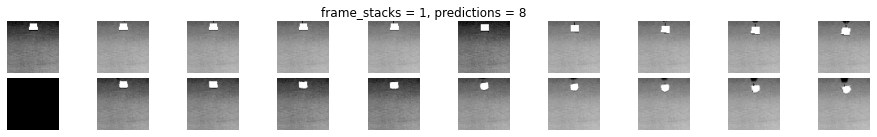

MSE of predictions:  [ 0.98051375  7.905434    9.932282   12.382294   15.103587   14.835757
 16.589134   18.539804  ]


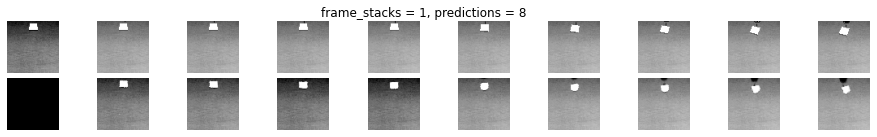

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/winitdef_lm_ul_osc_v_r1.50_kl1.00_lr3e4
MSE of predictions:  [ 9.187507  9.987249 10.505789  8.926998 13.119533 20.228315 24.628614
 42.231018]


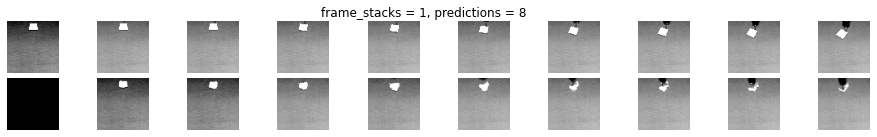

MSE of predictions:  [ 3.9124436  4.215594   7.516772  14.413752  22.217808  30.839277
 35.93246   40.310486 ]


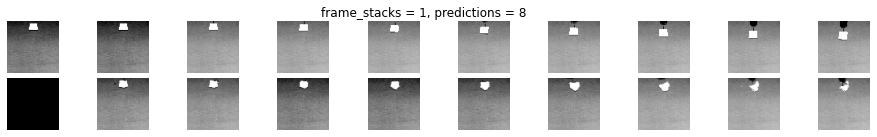

MSE of predictions:  [ 5.420841   6.6240664  8.356164   8.429761  17.643923  16.144562
 23.490755  24.42728  ]


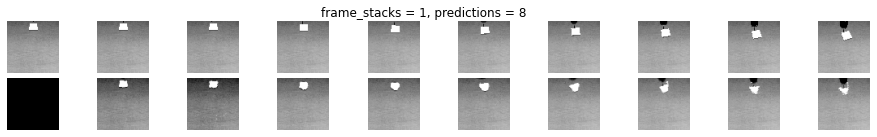

MSE of predictions:  [ 1.0119585  3.9846141  7.505989  11.513947  16.51601   18.79212
 19.568233  22.335957 ]


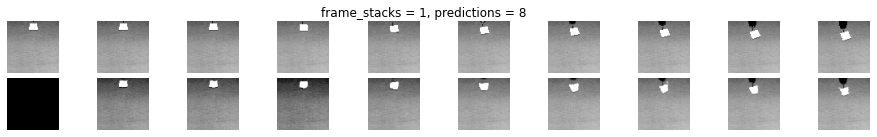

MSE of predictions:  [ 1.4819202  3.3642294  5.1540136  6.127414  10.407079  12.510806
 15.264771  19.931385 ]


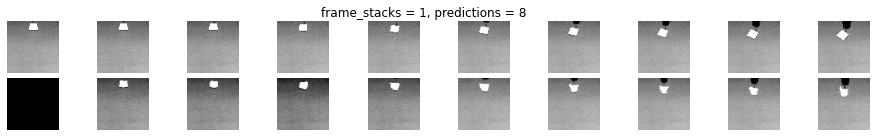

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/lm_ul_osc_v_r1.50_kl1.00_lr3e4
MSE of predictions:  [ 2.781112   4.3063664  7.2903185  8.153973   8.694599   8.456709
  6.173835  12.021943 ]


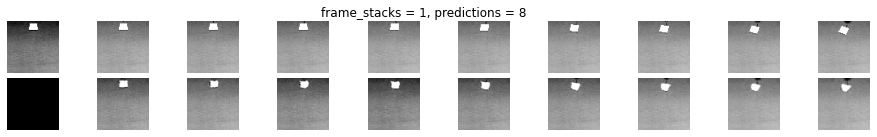

MSE of predictions:  [ 5.560043   8.924386  12.6416445 13.198776  14.216621  13.497235
 10.000152  14.666856 ]


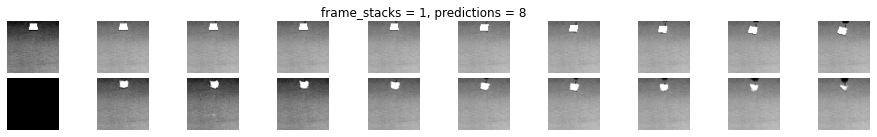

MSE of predictions:  [ 6.512896 12.423641 18.51077  15.148788 14.508046 13.305463 13.945089
 15.173028]


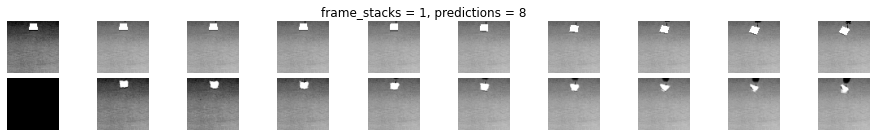

MSE of predictions:  [ 7.071694  11.358918  16.375858   4.2251053  2.7707596  7.4747825
 13.593131  19.639116 ]


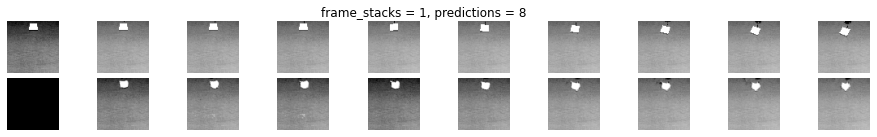

MSE of predictions:  [ 6.5860944  8.761658  11.664854  11.779358  14.192726  13.480218
 14.211025  14.740546 ]


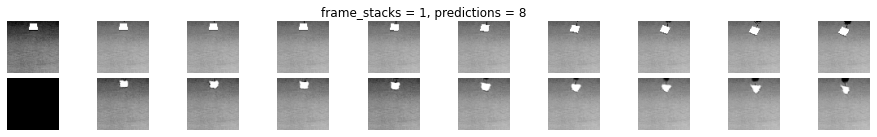

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/lm_ul_osc_vha_r0.95_kl0.80_lr3e4
MSE of predictions:  [ 7.457034 12.370962 14.949265 13.864627 16.956615 26.451897 33.892345
 39.453186]


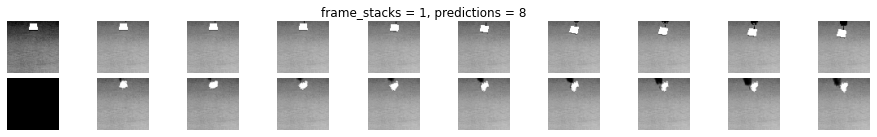

MSE of predictions:  [ 1.5951759  8.79226   10.366822   9.758851   6.146597   5.131781
 10.761642  11.3581915]


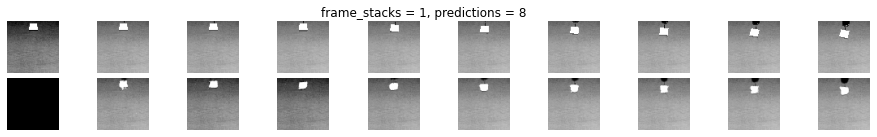

MSE of predictions:  [ 7.466842 18.639244 19.856985 17.81131  18.461681 21.587246 27.883589
 35.612316]


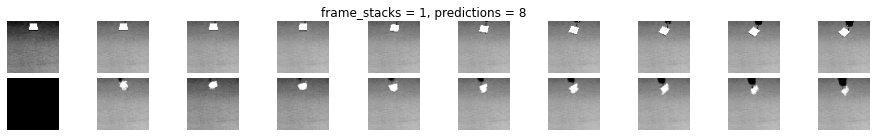

MSE of predictions:  [ 7.1283855 13.888974  14.572655  17.835331  21.941267  33.46531
 40.283398  53.45291  ]


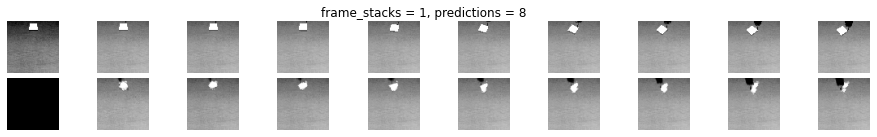

MSE of predictions:  [13.926211  9.625586  8.50642  10.181975 17.33825  26.198423 35.466053
 45.082478]


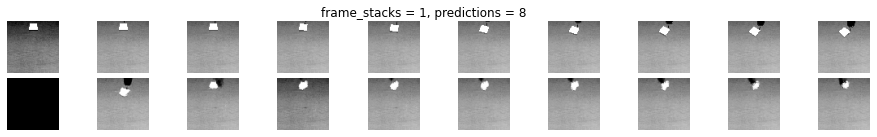

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/lm_ul_osc_v_r0.5_kl1.00_lr3e4
MSE of predictions:  [ 5.9334474  5.2444515 11.223503  12.892028  19.551386  26.842182
 39.289642  50.68946  ]


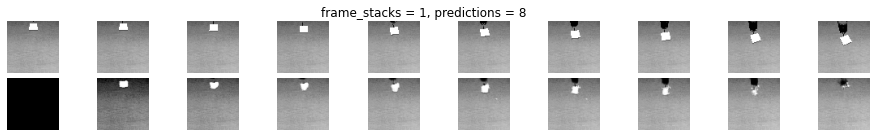

MSE of predictions:  [ 6.0426593  8.132013  10.098058  12.462608   9.325141  10.629221
  8.455865  11.776666 ]


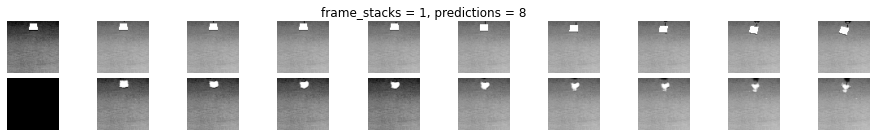

MSE of predictions:  [ 5.4955025  8.011882  13.217302   9.464328   9.048045  10.713623
 11.054614  12.687325 ]


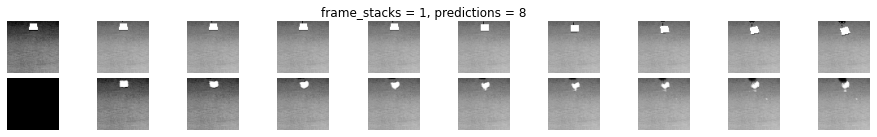

MSE of predictions:  [ 5.881951   8.243729  12.544833   9.639002   6.175359   5.6171427
 13.355666  11.735159 ]


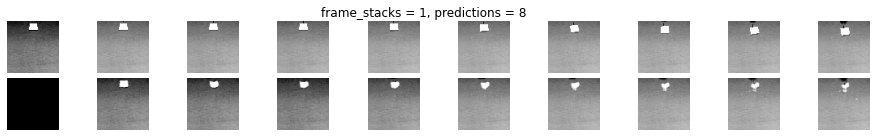

MSE of predictions:  [ 6.718446   8.53411   14.304733   7.4322224  5.5911274 11.348662
 11.290693  13.377606 ]


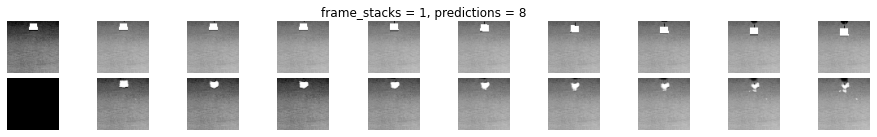

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/winitdef_lm_ul_osc_vha_r0.95_kl0.80_lr3e4
MSE of predictions:  [ 4.3698697  4.8293424  4.2009945  6.9761214 13.016407  19.491434
 21.80225   34.838196 ]


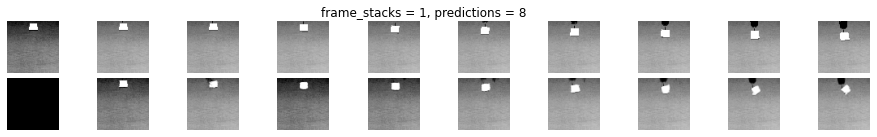

MSE of predictions:  [15.259305 10.187692  8.238903  9.295217 12.501872 18.993216 28.577282
 59.336723]


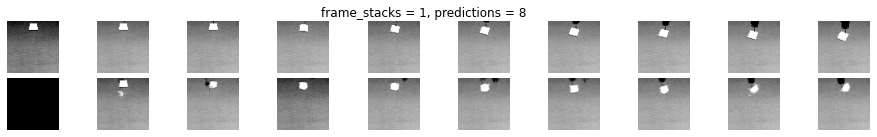

MSE of predictions:  [ 7.7375946  9.859217  10.273475   7.245237   7.296576  17.076008
 25.348639  31.700453 ]


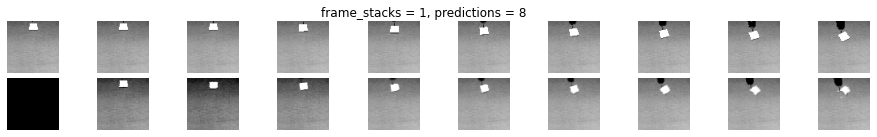

MSE of predictions:  [ 2.2637658  4.46517    4.878193   8.314809  14.694486  20.011593
 26.46871   39.939327 ]


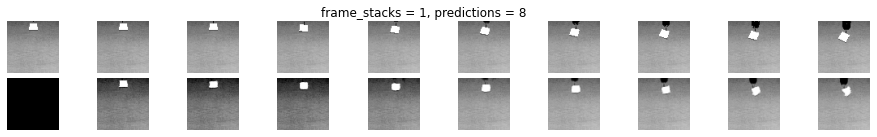

MSE of predictions:  [ 4.7669473  5.8858933  5.6953692  9.4552965 13.331264  20.665577
 29.273565  29.685537 ]


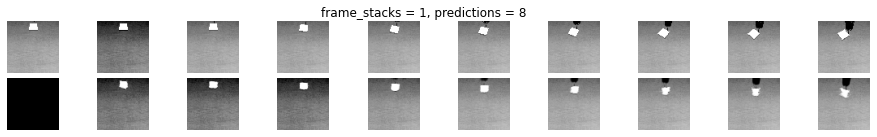

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/lm_ul_osc_vha_r0.5_kl1.00_lr3e4
MSE of predictions:  [15.116914 16.10498  19.223955 23.27643  29.140032 33.084026 41.921528
 46.84321 ]


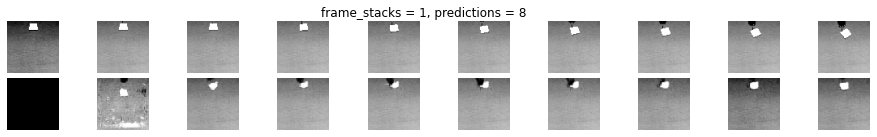

MSE of predictions:  [ 9.887288  8.347617 11.682538 20.734343 27.26     32.334686 36.75355
 41.07546 ]


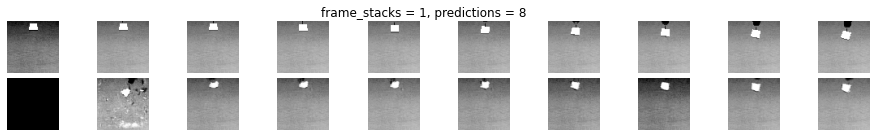

MSE of predictions:  [20.674084   7.2078996 10.104906  18.056854  20.833939  29.266504
 30.21333   39.999912 ]


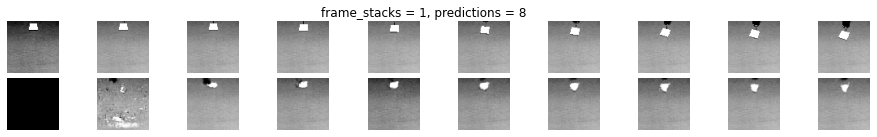

MSE of predictions:  [27.109503 22.980705 19.957556 21.980223 33.061256 40.77182  48.974865
 62.838318]


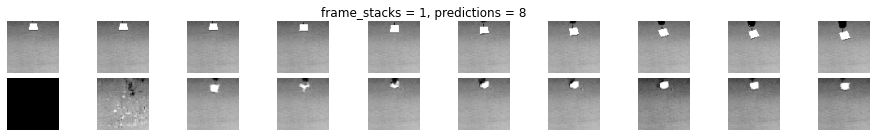

MSE of predictions:  [42.616146  5.776856  8.509886 12.052549 16.723557 22.15009  30.419498
 35.574036]


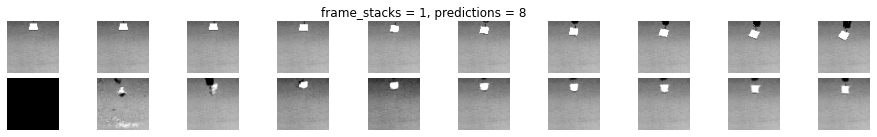

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/lm_ul_osc_vha_r1.00_kl0.50_lr3e4
MSE of predictions:  [37.352055 43.383923 44.071457 47.228756 30.815243 37.153584 42.392735
 66.58833 ]


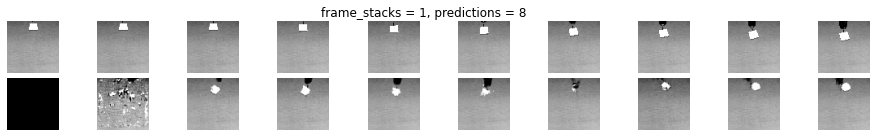

MSE of predictions:  [47.786304 38.107822 29.382778 33.885986 25.423027 29.723997 37.445698
 45.9002  ]


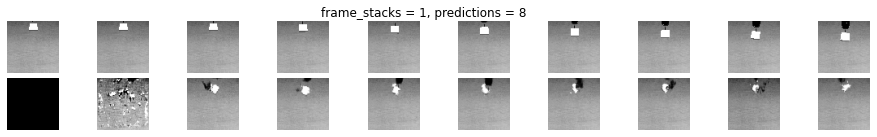

MSE of predictions:  [65.389046 68.65374  34.715187 27.572746 21.02949  30.302773 55.229977
 64.58756 ]


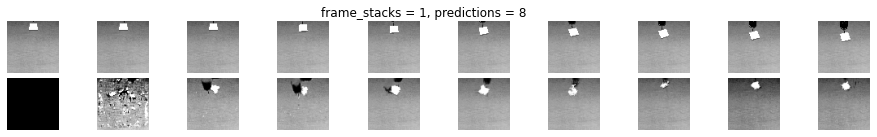

MSE of predictions:  [49.179024 14.165668 11.850107  8.432046 16.212502 27.070702 34.56263
 32.240036]


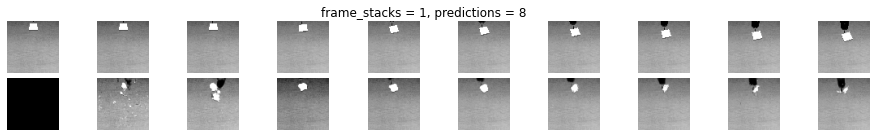

MSE of predictions:  [41.268562 27.519587 25.436785 23.728075 24.326645 25.204868 27.046139
 30.456398]


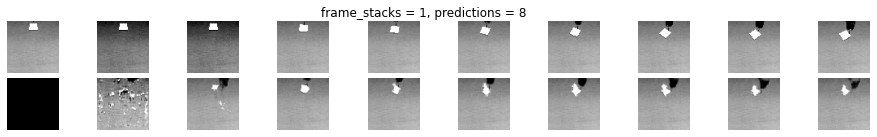

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/winitdef_lm_ul_osc_v_r1.00_kl0.50_lr3e4
MSE of predictions:  [ 2.8085423  7.4296117  5.3351     5.282618   7.4369464  8.923856
 15.283692  21.42265  ]


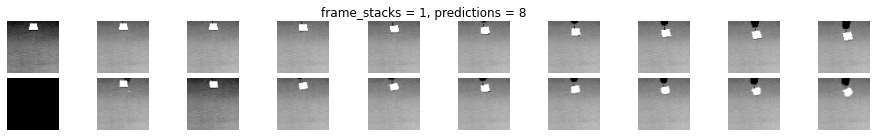

MSE of predictions:  [ 1.6958125  7.290511   5.6311884  6.73088   11.56645   12.585424
  8.906029  10.819638 ]


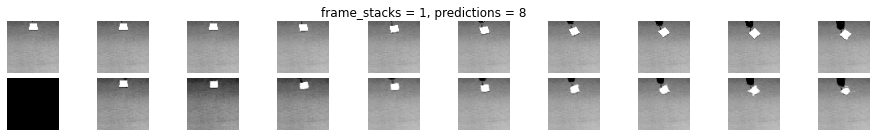

MSE of predictions:  [ 2.2385993  4.362546   4.7375665  6.833475  10.368428  14.344409
 20.05544   21.373484 ]


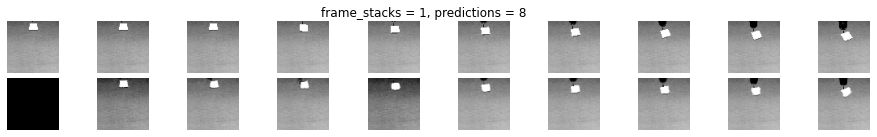

MSE of predictions:  [ 1.8839366  9.25311    8.782954  10.13004   12.9356365 19.473494
 22.173182  24.34213  ]


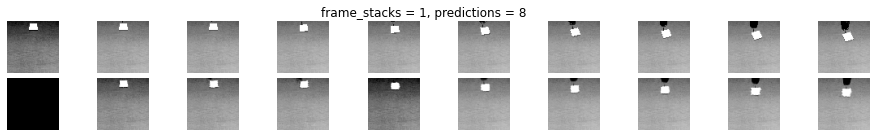

MSE of predictions:  [ 2.6096811  3.5568845  4.291106   6.566727   8.154617  12.122418
 15.553314  21.954142 ]


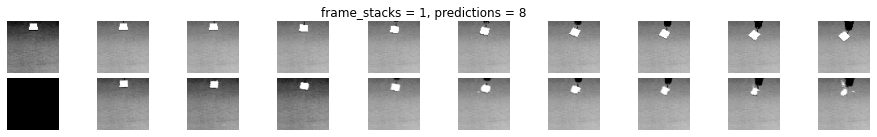

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/lm_ul_osc_v_r1.00_kl1.50_lr3e4
MSE of predictions:  [ 3.9082875  7.187606   9.298506   9.096005  10.311359  13.479738
 12.889327  20.039324 ]


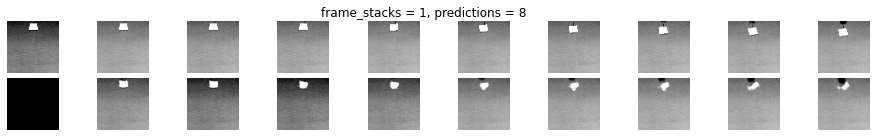

MSE of predictions:  [ 3.2943795  6.819123   7.80502    5.1109815  5.6777325  9.521464
 11.203265  14.355197 ]


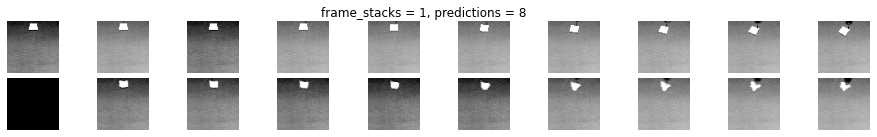

MSE of predictions:  [ 3.27344    5.443343   2.1865733  2.5730803  6.1578083 10.990652
 18.017225  23.462801 ]


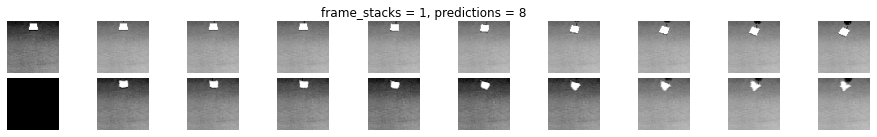

MSE of predictions:  [ 4.2665405  6.4665155  4.851245   5.7668743  5.0653415 10.827104
 12.574503  14.186125 ]


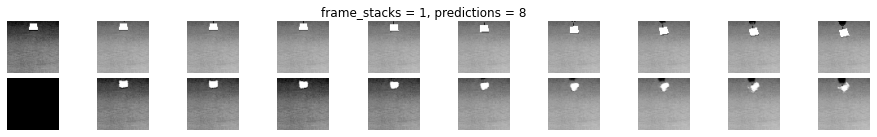

MSE of predictions:  [ 3.5701392  6.5623946  4.0022826  6.4249125  9.508369  18.085222
 24.174007  31.26416  ]


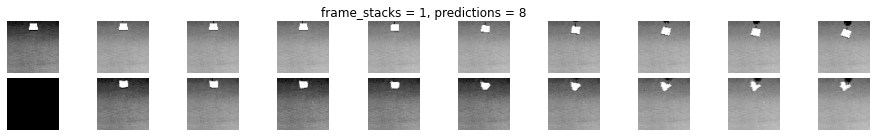

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/winitdef_lm_ul_osc_vha_r1.00_kl1.50_lr3e4
MSE of predictions:  [38.652588 25.088163 17.053982 24.741602 33.43288  40.266212 48.007687
 52.774933]


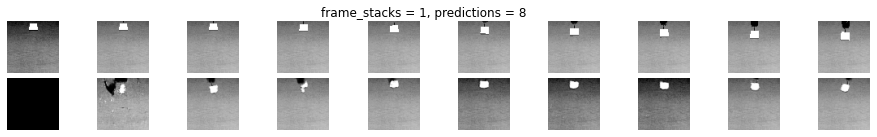

MSE of predictions:  [11.42852  11.670798 19.036497 24.886992 27.322886 45.05845  54.259266
 57.12844 ]


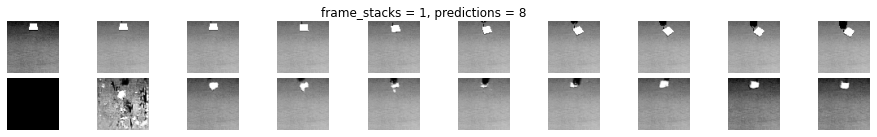

MSE of predictions:  [17.661793 13.987104 18.598429 25.206083 36.697617 50.81017  61.342274
 66.64961 ]


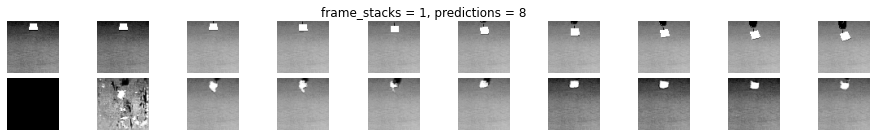

MSE of predictions:  [45.14702  21.694363 17.51403  25.00287  30.644213 36.633907 43.87964
 54.35311 ]


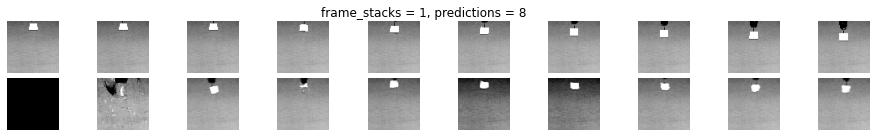

MSE of predictions:  [36.09405  29.955595 23.031784 28.748402 42.344326 52.892155 62.64663
 68.88846 ]


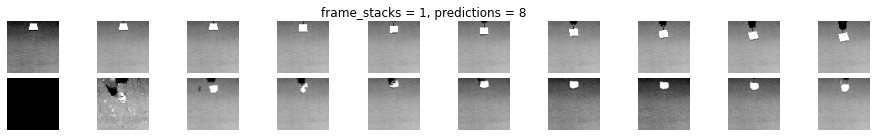

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/winitdef_lm_ul_osc_vha_r1.50_kl1.00_lr3e4
MSE of predictions:  [43.870964 39.061207 19.320635 10.199191 11.333511 13.71318  24.01247
 28.271658]


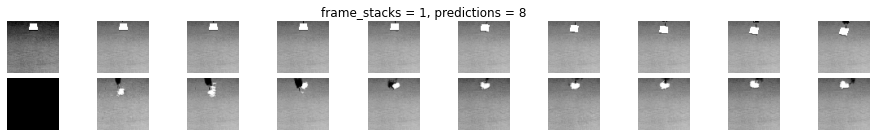

MSE of predictions:  [ 7.727221  12.4634495 17.178904  16.097858  16.365269  20.298592
 21.103565  20.254587 ]


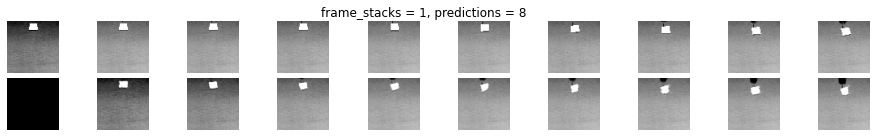

MSE of predictions:  [10.906519 18.867464 40.59056  17.7656   19.377443 13.209455 16.701267
 25.426258]


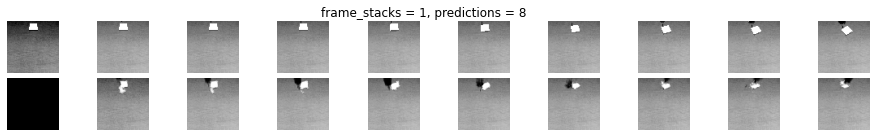

MSE of predictions:  [ 1.552738  9.191076  9.6336   10.569296 14.827838 18.859856 23.307022
 24.474052]


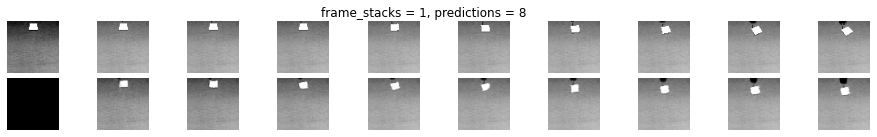

MSE of predictions:  [ 8.103134 13.43176  18.805187 15.302363 12.512997 17.083742 22.266558
 28.487585]


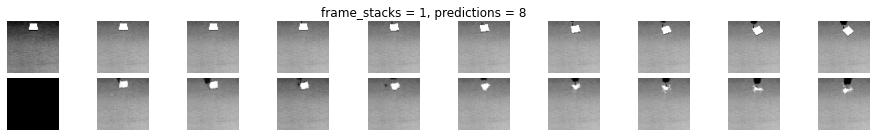

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/winitdef_lm_ul_osc_v_r1.00_kl1.50_lr3e4
MSE of predictions:  [ 9.775366 12.01664  10.123927  8.104597  8.428887 10.550082 18.89596
 26.634533]


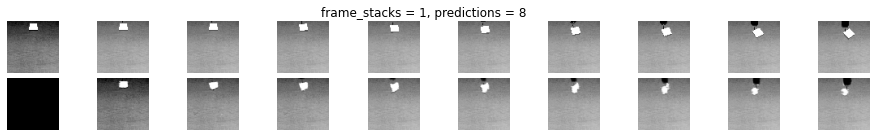

MSE of predictions:  [11.618091 15.089817 15.361492 11.697155  8.614972 12.588451 17.7952
 28.901878]


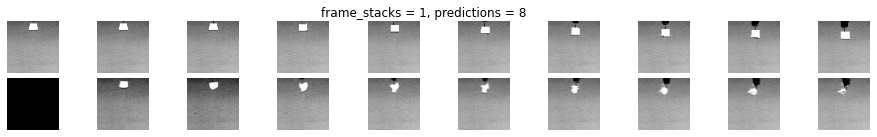

MSE of predictions:  [ 9.867898 12.530868 11.299889 10.864041  7.556901  9.32615  15.855362
 19.225506]


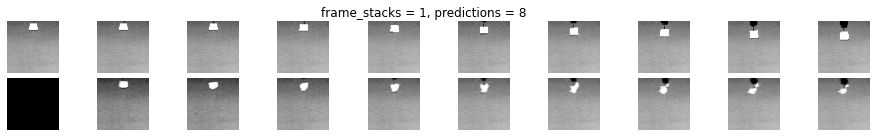

MSE of predictions:  [13.028388 14.518824 13.266526 13.594757 12.870956 15.78685  14.031007
 28.628193]


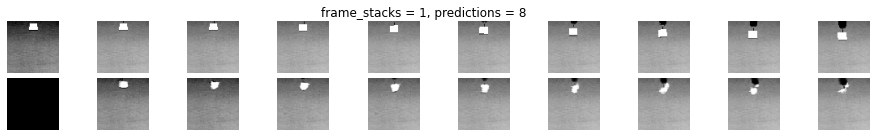

MSE of predictions:  [10.7974415 12.942831  10.813097  10.949295   8.77836   10.336995
 17.319952  21.111233 ]


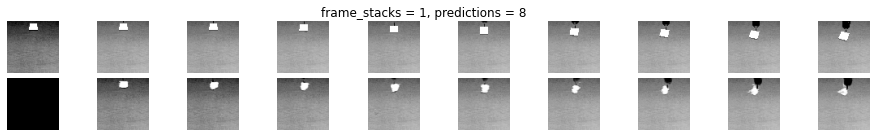

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/winitdef_lm_ul_osc_v_r0.95_kl0.80_lr3e4
MSE of predictions:  [ 8.13293  11.623588 13.315751 13.073089 16.896923  9.107688 17.867022
 21.824224]


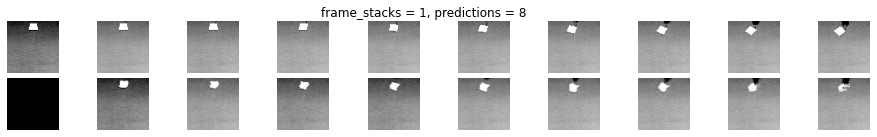

MSE of predictions:  [ 8.337052 15.057702  9.826453  6.085012  5.121093  8.867041 15.740985
 23.786991]


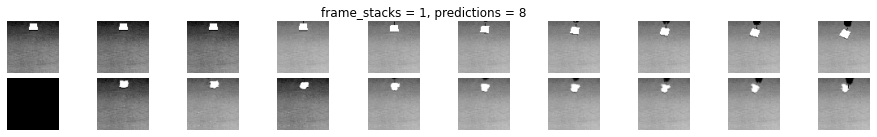

MSE of predictions:  [ 7.7571597 15.690458   6.319144   7.8429747  5.9972863  3.7248542
 12.353616  21.360022 ]


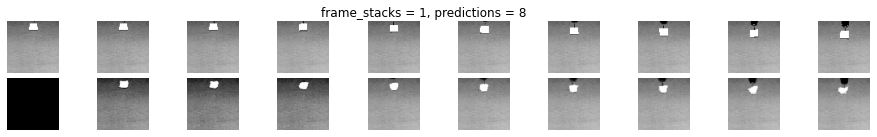

MSE of predictions:  [ 6.1976604  7.5960684  5.7244177  5.8985515  7.858068   9.93891
 11.201877  15.288666 ]


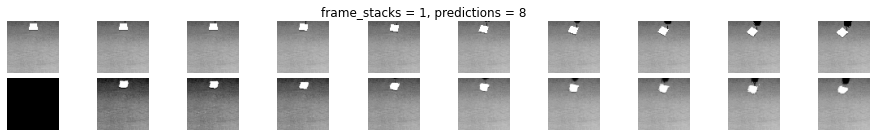

MSE of predictions:  [ 6.999922  9.83279   8.685317  9.400468  9.199963 11.454473 16.1103
 14.689857]


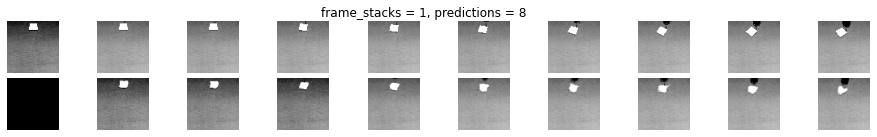

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/lm_ul_osc_v_r0.95_kl0.80_lr3e4
MSE of predictions:  [ 4.334084 12.834194  9.611589 10.548309 12.255581 16.74211  29.091295
 28.597952]


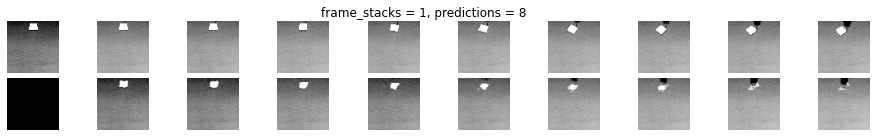

MSE of predictions:  [ 1.8070222  3.8555665  5.782936   4.2459745  9.538856  13.736928
 13.571103  22.970644 ]


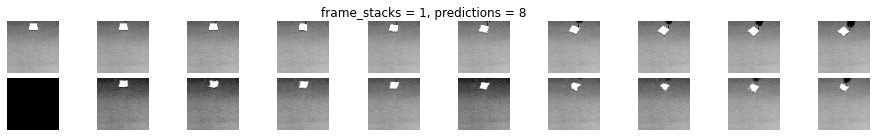

MSE of predictions:  [ 3.0249135  7.8695636 12.932848  13.986589  20.347443  22.885942
 22.025223  25.274935 ]


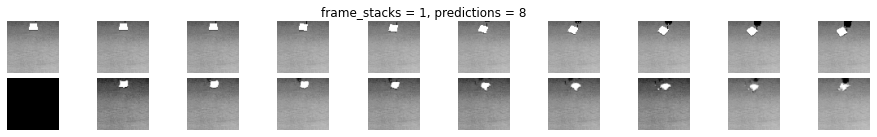

MSE of predictions:  [ 3.376712   2.495      7.088534   6.8029017 10.86007   17.441961
 23.213816  49.360485 ]


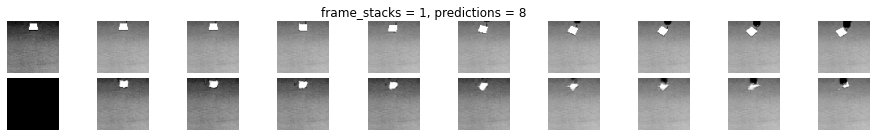

MSE of predictions:  [ 6.3877745  8.072598  10.392381  12.241402  14.585835  17.632704
 31.088512  50.398094 ]


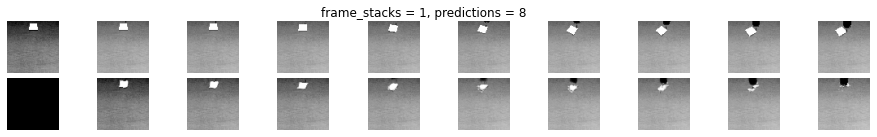

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/winitdef_lm_ul_osc_v_r0.5_kl1.00_lr3e4
MSE of predictions:  [ 6.6660175  9.313077   4.7587256 11.410128   7.1376014 12.880973
 13.1377325 16.64084  ]


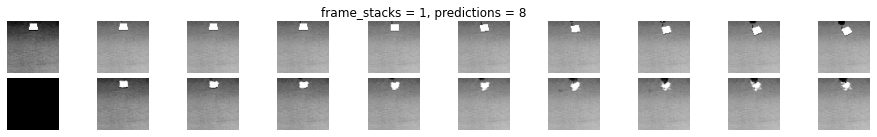

MSE of predictions:  [ 7.774813  10.557478   8.72551    7.335761   7.5522766  8.99291
 14.6999655 21.533117 ]


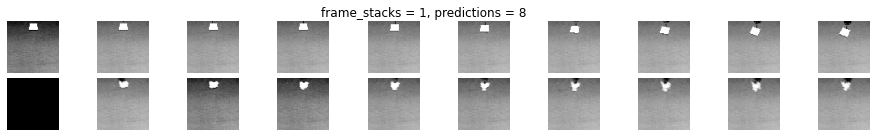

MSE of predictions:  [ 8.065271 10.878095  9.603229 10.526181 13.010759 11.189864 14.881363
 19.4911  ]


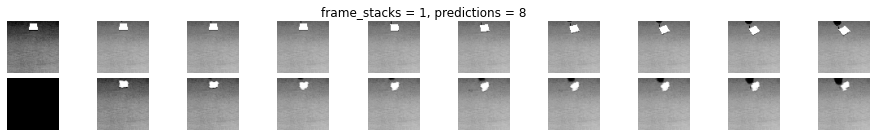

MSE of predictions:  [ 7.6377616  9.813295  10.383945   7.193423  11.360713  17.468237
 23.79225   32.095345 ]


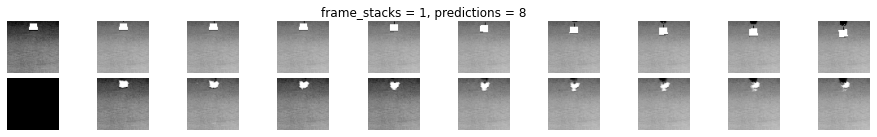

MSE of predictions:  [ 7.4165697 12.109543  10.650091   7.485718  10.240035  18.303026
 21.86229   28.985569 ]


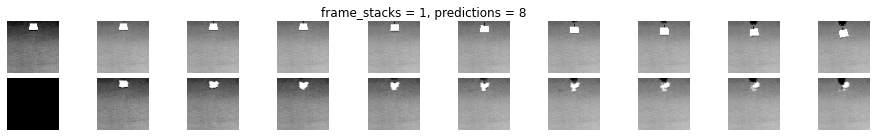

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/winitdef_lm_ul_osc_vha_r0.5_kl1.00_lr3e4
MSE of predictions:  [18.400782 16.654528 15.277441 14.801998  8.781653 17.968897 22.28872
 35.06739 ]


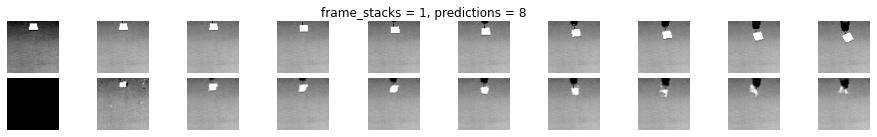

MSE of predictions:  [16.927496  12.703851   7.78325    5.9434485 13.023454  12.719813
 18.812597  28.007975 ]


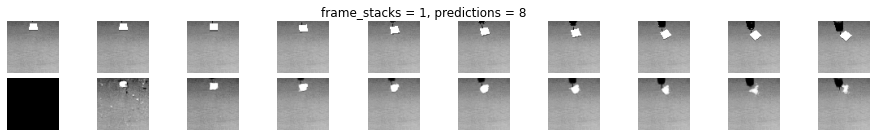

MSE of predictions:  [17.279825 15.579938 11.449921 14.086713  9.06654  18.034292 24.229387
 37.669365]


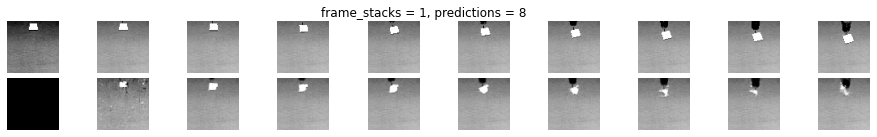

MSE of predictions:  [20.611937 19.555285 20.246786 18.347387 15.358031 16.442097 44.246937
 95.29862 ]


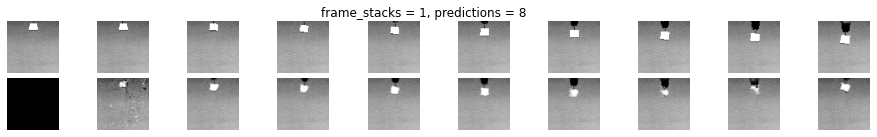

MSE of predictions:  [14.711622 11.740862 11.059103 10.899753 11.343356 14.671894 24.57751
 27.724455]


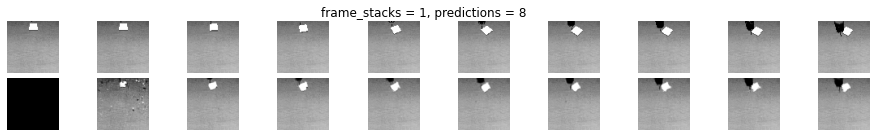

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/lm_ul_osc_vha_r1.50_kl1.00_lr3e4
MSE of predictions:  [46.098217 30.610683 17.349964 17.687525 19.778517 18.129095 18.263859
 14.921353]


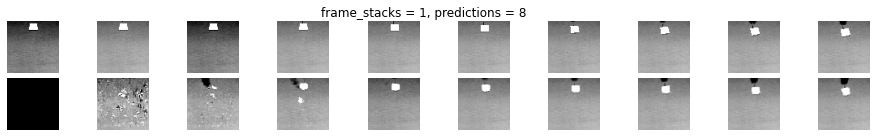

MSE of predictions:  [53.313652 48.46253  34.37253  28.262949 16.810587 21.800856 31.234377
 43.518063]


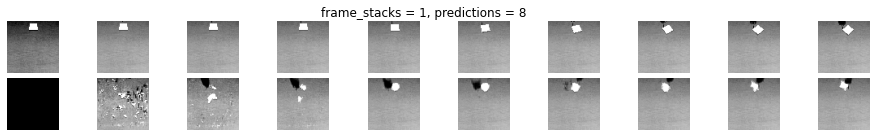

MSE of predictions:  [17.808886 16.897064 17.077902 20.62081  22.617477 28.284933 34.2081
 38.023464]


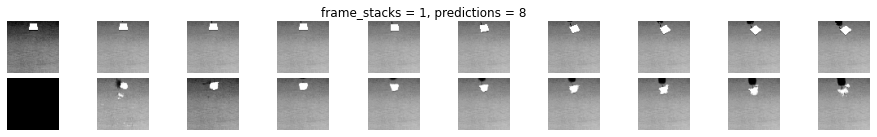

MSE of predictions:  [79.45048  60.980278 31.284874 14.439981 17.954613 23.13225  34.580154
 37.922817]


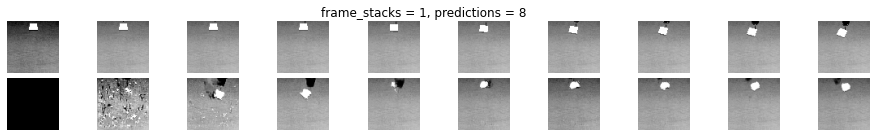

MSE of predictions:  [110.66643   74.09686   75.033195  72.78933   49.44641   21.774841
  25.341522  35.172024]


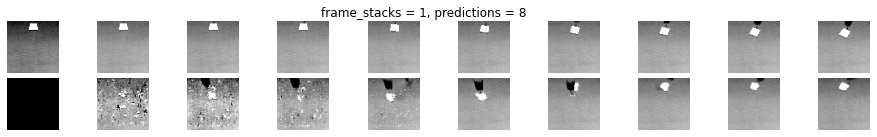

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/lm_ul_osc_vha_r1.00_kl1.50_lr3e4
MSE of predictions:  [12.016819   4.3350616  3.346858   3.1660693  4.8469095  6.4574285
 10.654116  15.576896 ]


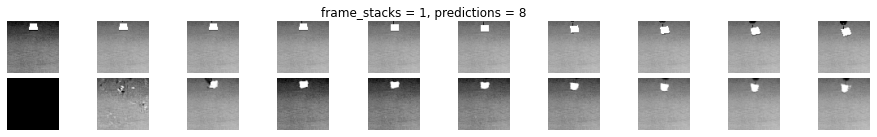

MSE of predictions:  [ 4.0965734  3.9038522  3.6008716  8.349842   8.411433   6.905053
 15.004652  17.887615 ]


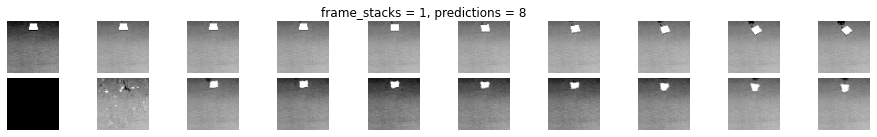

MSE of predictions:  [ 1.7794921  2.2479517  5.3990192  6.955429  15.304293  14.572148
 19.347322  21.830206 ]


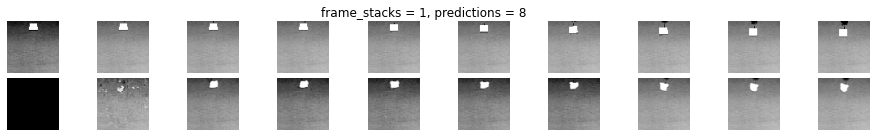

MSE of predictions:  [59.27263    2.7409806  4.248212   7.795372   9.004628   9.976796
 12.203356  16.133312 ]


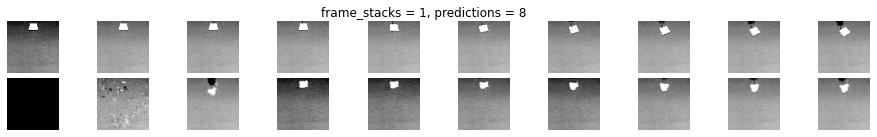

MSE of predictions:  [ 6.591438   2.0036285  7.358662  13.350739  19.766272  22.862154
 25.633638  29.134933 ]


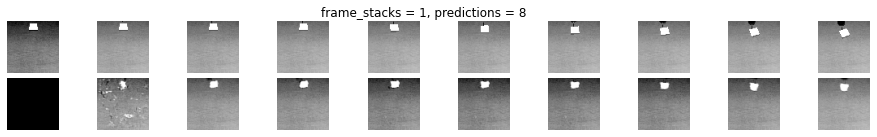

In [4]:
dict_of_models = load_models_dir(args.models_dir)

with torch.no_grad():
    for path, model_args in dict_of_models.items():
            
        nets = load_vh_models(path=path, args=model_args, mode='eval', device=args.device)

        if model_args.dim_x[0] == 1:
            imgs = data['img_gray']
        elif model_args.dim_x[0] == 3:
            imgs = data['img_rgb']
        
        total_len = imgs.shape[1]
        T = model_args.frame_stacks
        
        ii = np.random.randint(imgs.shape[0] // args.n_examples)
        batch_range = range(args.n_examples*ii, args.n_examples*(ii+1))
        start_idx = 0
        
        x = imgs[:, start_idx:][batch_range, :(T + 1 + args.n_pred)]
        x_i = imgs[:, start_idx:][batch_range, :(T + 1)] 
        x_i = frame_stack(x_i, frames=T)[:, 0] 

        if model_args.context=="initial_latent_state":
            ctx_img_i = x_i   

        x_ft_i = data['haptic'][:, start_idx:][batch_range, T:(T + 1)]
        x_arm_i = data['arm'][:, start_idx:][batch_range, T:(T + 1)]

        u = actions[:, start_idx:][
            batch_range, 
            (T + 1):(T + 1 + args.n_pred)
        ] 
            
        # Roll-out or predictions
        if model_args.context_modality != "none":
            if model_args.context_modality == "joint": 
                ctx_i = torch.cat((x_ft_i, x_arm_i), dim=-1) # (n, l, f, 12)
            elif model_args.context_modality == "ft": 
                ctx_i = x_ft_i
            elif model_args.context_modality == "arm":
                ctx_i = x_arm_i
            ctx_i = ctx_i.float().to(device=args.device) # (n, l, f, 6)
            ctx_i = ctx_i.transpose(-1, -2)
            ctx_i = ctx_i.reshape(-1, *ctx_i.shape[2:])  

        # Encode
        z_all_enc = []

        z_img = nets["img_enc"](x_i)
        z_all_enc.append(z_img)              

        if model_args.context_modality != "none":
            z_context = nets["context_enc"](ctx_i)
            z_all_enc.append(z_context)
        if model_args.context=="initial_latent_state":
            z_img_context = nets["context_img_enc"](ctx_img_i)
            z_all_enc.append(z_img_context)

        # Concatenate modalities and mix
        z_cat_enc = torch.cat(z_all_enc, dim=1)
        z_i, mu_z_i, logvar_z_i = nets["mix"](z_cat_enc)
        var_z_i = torch.diag_embed(torch.exp(logvar_z_i))
        h_i = None

        z_hat = torch.zeros((args.n_examples, (1 + args.n_pred), model_args.dim_z)).to(device=args.device)
        z_hat[:, 0] = z_i
        
        # Predict
        for jj in range(args.n_pred):
            z_ip1, mu_z_ip1, var_z_ip1, h_ip1 = nets["dyn"](
                z_t=z_i, 
                mu_t=mu_z_i, 
                var_t=var_z_i, 
                u=u[:, jj], 
                h_0=h_i, 
                single=True
            )

            z_hat[:, jj + 1] = mu_z_ip1
            z_i, mu_z_i, var_z_i, h_i = z_ip1, mu_z_ip1, var_z_ip1, h_ip1    
                    
        # Decode
        z_all_dec = []
        z_all_dec.append(z_hat)

        if model_args.context=="initial_latent_state" or model_args.context=="goal_latent_state":
            z_img_context_rep = z_img_context.unsqueeze(1).repeat(1, (args.n_pred + 1), 1)
            z_all_dec.append(z_img_context_rep)
        
        z_cat_dec = torch.cat(z_all_dec, dim=-1)
        
        x_hat = nets["img_dec"](z_cat_dec.reshape(-1, *z_cat_dec.shape[2:]))
        x_hat = x_hat.reshape(args.n_examples, (args.n_pred + 1), *x_hat.shape[1:])

        # Move to cpu, np
        x_hat = x_hat.cpu().numpy()
        x = x.cpu().numpy()
        mse = np.sum((x_hat[:, 1:, 1].reshape(args.n_examples, args.n_pred, -1) - 
                      x[:, 2:, 0].reshape(args.n_examples, args.n_pred, -1))**2, axis=2)

        # Plotting
        for bb in range(args.n_examples):
            columns = T + 1 + args.n_pred
            rows = 2
            fig=plt.figure(figsize=(16, 2))
            fig.suptitle('frame_stacks = {}, predictions = {}'.format(T, args.n_pred))
            for ii in range(columns*rows):
                if ii<((columns*rows)/2):
                    img = x[bb,ii,0,:,:]
                else:
                    idx = int(ii-((columns*rows)/2))
                    if idx < T:
                        img = np.zeros((model_args.dim_x[1], model_args.dim_x[2]))
                    else:
                        img = x_hat[bb,idx-1,0,:,:]
                fig.add_subplot(rows, columns, ii+1)
                plt.imshow(img, cmap="gray")
                
                plt.axis('off')
            print("MSE of predictions: ", mse[bb])
            plt.subplots_adjust(wspace=0.1, hspace=0.1)
            plt.show()